In [2]:
#Nama :RAFBY SAPUTRA MOKODOMPIT
#NAMA :KRISKERRY WILLIAM TOOY

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Memanggil Dataset

df = pd.read_csv('toyota.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


<Axes: >

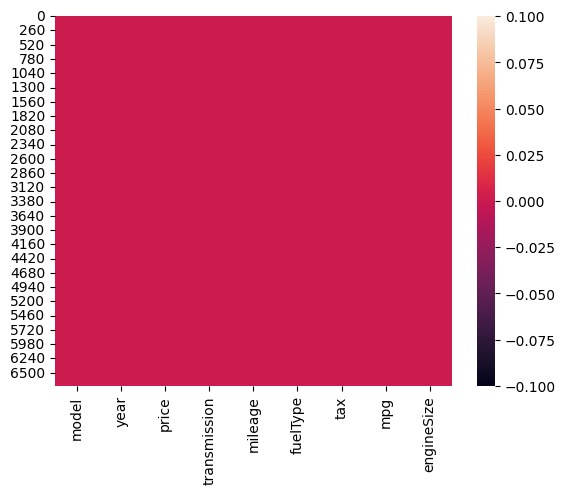

In [5]:
sns.heatmap(df.isnull())

In [6]:
models = df.groupby('model').count()[['tax']].sort_values(by='tax', ascending=True).reset_index()
models = models.rename(columns={'tax':'numberofcars'})

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ' Verso-S'),
  Text(1, 0, ' Urban Cruiser'),
  Text(2, 0, ' IQ'),
  Text(3, 0, ' Camry'),
  Text(4, 0, ' Supra'),
  Text(5, 0, ' PROACE VERSO'),
  Text(6, 0, ' Land Cruiser'),
  Text(7, 0, ' GT86'),
  Text(8, 0, ' Hilux'),
  Text(9, 0, ' Verso'),
  Text(10, 0, ' Avensis'),
  Text(11, 0, ' Prius'),
  Text(12, 0, ' Corolla'),
  Text(13, 0, ' RAV4'),
  Text(14, 0, ' C-HR'),
  Text(15, 0, ' Auris'),
  Text(16, 0, ' Aygo'),
  Text(17, 0, ' Yaris')])

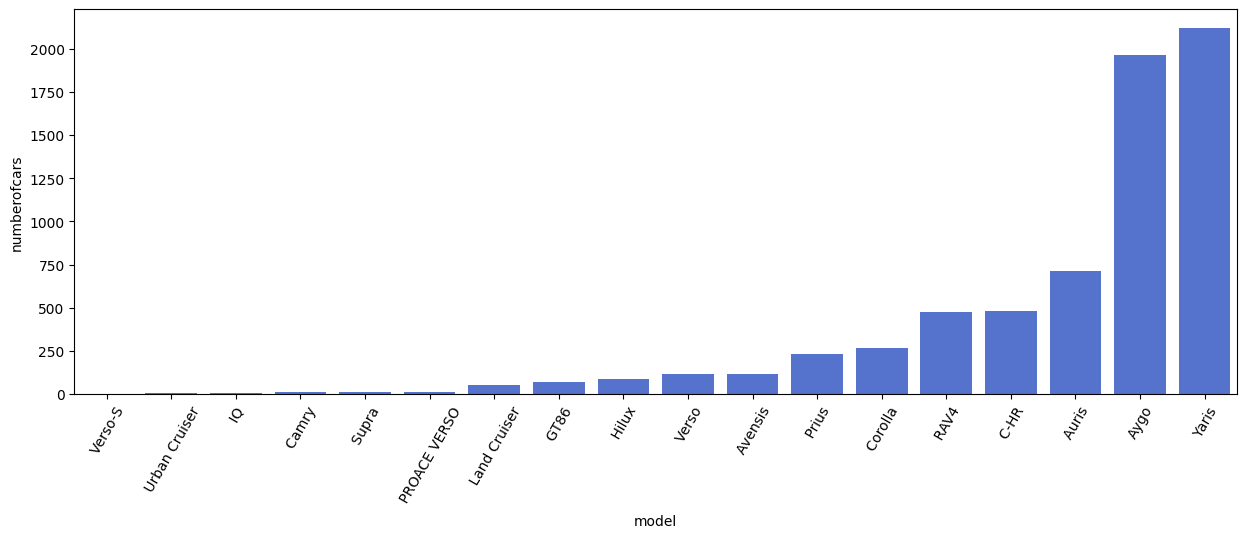

In [9]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['model'], y=models['numberofcars'], color='royalblue')
plt.xticks(rotation=60)

In [15]:
#Ukuran mesin

engine = df.groupby('engineSize').count()[['tax']].sort_values(by='tax').reset_index()
engine = engine.rename(columns={'tax':'count'})

<Axes: xlabel='engineSize', ylabel='count'>

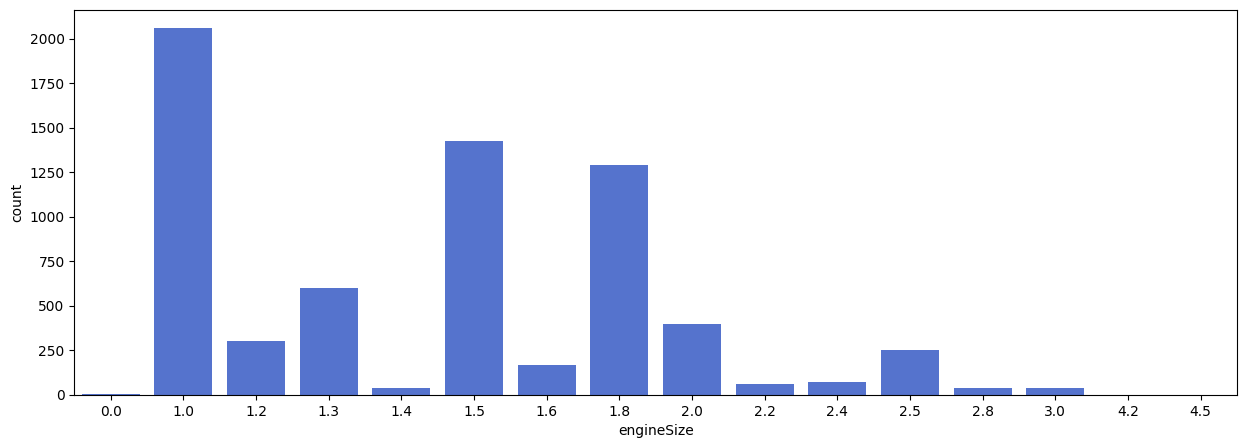

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(x=engine['engineSize'], y=engine['count'], color='royalblue')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25728\2156097892.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mileage'])


<Axes: xlabel='mileage', ylabel='Density'>

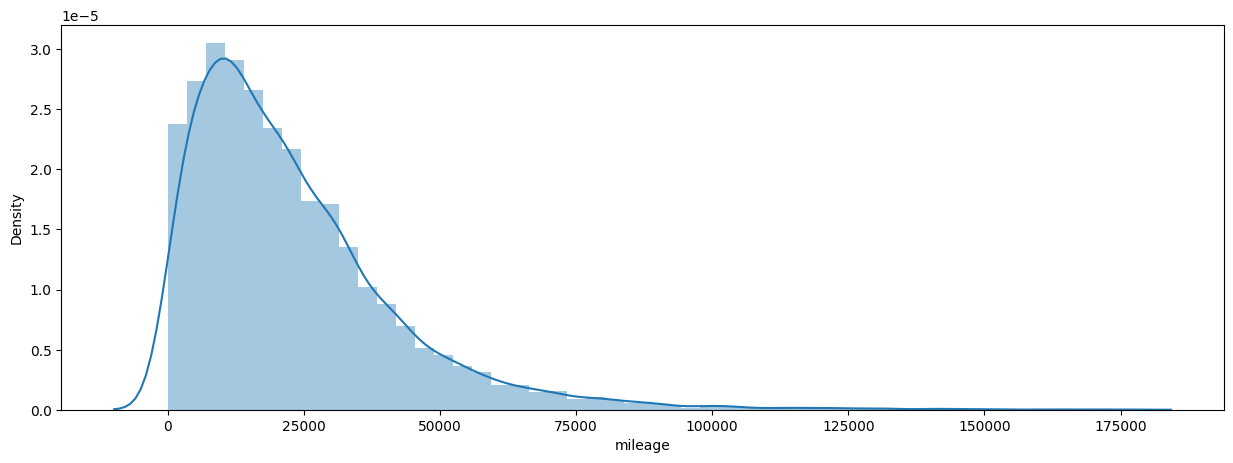

In [18]:
#Distribusi Mileage
plt.figure(figsize=(15,5))
sns.distplot(df['mileage'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25728\2080694032.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

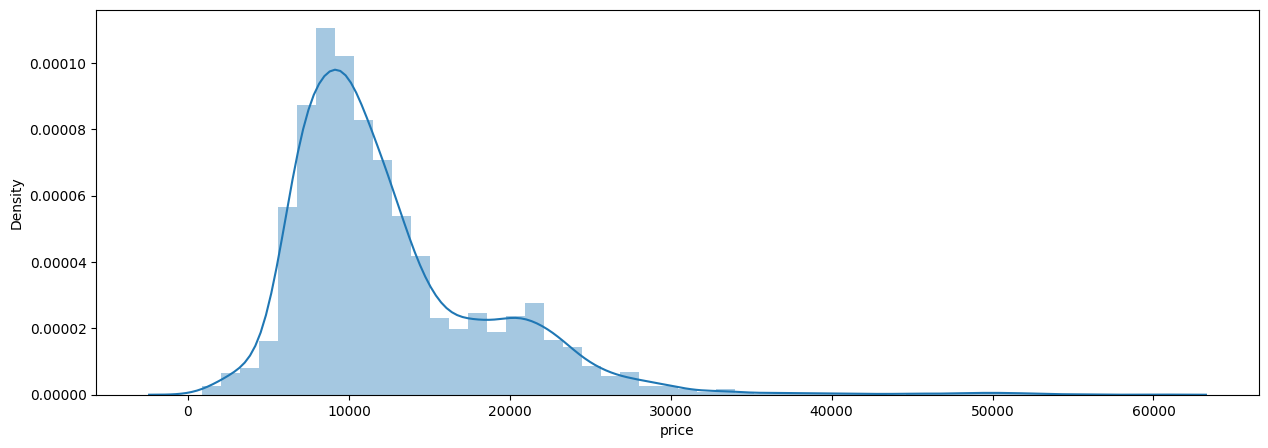

In [19]:
#Distribusi Harga mobil

plt.figure(figsize=(15,5))
sns.distplot(df['price'])

In [20]:
# Seleksi Fitur

features = ['year','mileage','tax','mpg','engineSize']
x = df[features]
y = df['price']
x.shape , y.shape 

((6738, 5), (6738,))

In [21]:
# Split data training dan data testing

from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(1685,)

In [22]:
# Membuat Model(Regresi Linear)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [23]:
score = lr.score(X_test, y_test)
print('Akurasi Model Regresi Linear = ', score)


Akurasi Model Regresi Linear =  0.7678983314475204


In [25]:
#Membuat Inputan Model Regresi Linear
input_data =np.array([[2019,5000,145,30.2,2]])
prediksi = lr.predict(input_data)
print('Estimasi Harga Mobil : ', prediksi)

Estimasi Harga Mobil :  [21208.50538579]


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
# Save Model
import pickle

filename = 'estimasi_mobil.sav'
pickle.dump(lr,open(filename, 'wb'))